In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import pandas as pd 
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


data=pd.read_csv('Spring 2023 data.csv')
data.fillna(1.5,inplace=True)
data['5:00 AM'].replace(1.5,data['5:00 AM'].mean(), inplace=True)
data['6:00 AM'].replace(1.5,data['6:00 AM'].mean(), inplace=True)
type(data['7:00 AM'][5])
data['7:00 AM'] = pd.to_numeric(data['7:00 AM'], errors='coerce', downcast='integer')
data['7:00 AM'].replace(1.5,data['7:00 AM'].mean(), inplace=True)

data['8:00 AM'] = pd.to_numeric(data['8:00 AM'], errors='coerce', downcast='integer')
data['8:00 AM'].replace(1.5,data['8:00 AM'].mean(), inplace=True)

data['9:00 AM'] = pd.to_numeric(data['9:00 AM'], errors='coerce', downcast='integer')
data['9:00 AM'].replace(1.5,data['9:00 AM'].mean(), inplace=True)

data['10:00 AM'] = pd.to_numeric(data['10:00 AM'], errors='coerce', downcast='integer')
data['10:00 AM'].replace(1.5,data['10:00 AM'].mean(), inplace=True)

data['11:00 AM'] = pd.to_numeric(data['11:00 AM'], errors='coerce', downcast='integer')
data['11:00 AM'].replace(1.5,data['11:00 AM'].mean(), inplace=True)

data['12:00 PM'] = pd.to_numeric(data['12:00 PM'], errors='coerce', downcast='integer')
data['12:00 PM'].replace(1.5,data['12:00 PM'].mean(), inplace=True)

data['1:00 PM'] = pd.to_numeric(data['1:00 PM'], errors='coerce', downcast='integer')
data['1:00 PM'].replace(1.5,data['1:00 PM'].mean(), inplace=True)

data['2:00 PM'] = pd.to_numeric(data['2:00 PM'], errors='coerce', downcast='integer')
data['2:00 PM'].replace(1.5,data['2:00 PM'].mean(), inplace=True)

data['3:00 PM'] = pd.to_numeric(data['3:00 PM'], errors='coerce', downcast='integer')
data['3:00 PM'].replace(1.5,data['3:00 PM'].mean(), inplace=True)

data['4:00 PM'] = pd.to_numeric(data['4:00 PM'], errors='coerce', downcast='integer')
data['4:00 PM'].replace(1.5,data['4:00 PM'].mean(), inplace=True)

data['5:00 PM'] = pd.to_numeric(data['5:00 PM'], errors='coerce', downcast='integer')
data['5:00 PM'].replace(1.5,data['5:00 PM'].mean(), inplace=True)

data['6:00 PM'] = pd.to_numeric(data['6:00 PM'], errors='coerce', downcast='integer')
data['6:00 PM'].replace(1.5,data['6:00 PM'].mean(), inplace=True)

data['7:00 PM'] = pd.to_numeric(data['7:00 PM'], errors='coerce', downcast='integer')
data['7:00 PM'].replace(1.5,data['7:00 PM'].mean(), inplace=True)

data['8:00 PM'] = pd.to_numeric(data['8:00 PM'], errors='coerce', downcast='integer')
data['8:00 PM'].replace(1.5,data['8:00 PM'].mean(), inplace=True)

data['9:00 PM'] = pd.to_numeric(data['9:00 PM'], errors='coerce', downcast='integer')
data['9:00 PM'].replace(1.5,data['9:00 PM'].mean(), inplace=True)

data['10:00 PM'] = pd.to_numeric(data['10:00 PM'], errors='coerce', downcast='integer')
data['10:00 PM'].replace(1.5,data['10:00 PM'].mean(), inplace=True)

data['11:00 PM'] = pd.to_numeric(data['11:00 PM'], errors='coerce', downcast='integer')
data['11:00 PM'].replace(1.5,data['11:00 PM'].mean(), inplace=True)


data.fillna(0)

2023-04-27 21:28:52.354761: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


,Facility,Location,Date,5:00 AM,6:00 AM,7:00 AM,8:00 AM,9:00 AM,10:00 AM,11:00 AM,...,4:00 PM,5:00 PM,6:00 PM,7:00 PM,8:00 PM,9:00 PM,10:00 PM,11:00 PM,Total Count,Status
0,Marino Recreation Center,Marino Center - Track,1/2/23 0:00,2.786275,1.0,1.0,0.0,15.287819,16.849705,4.0,...,4.0,5.0,6.0,3.0,1.0,23.350394,20.54626,8.609252,32,Active
1,Marino Recreation Center,Marino Center - Studio A,1/2/23 0:00,2.786275,0.0,0.0,0.0,15.287819,16.849705,2.0,...,3.0,2.0,1.0,3.0,1.0,23.350394,20.54626,8.609252,13,Active
2,Marino Recreation Center,Marino Center - Studio B,1/2/23 0:00,2.786275,0.0,0.0,0.0,15.287819,16.849705,4.0,...,2.0,3.0,2.0,2.0,1.0,23.350394,20.54626,8.609252,15,Active
3,Marino Recreation Center,Marino Center - Gymnasium,1/2/23 0:00,2.786275,1.0,1.0,0.0,15.287819,16.849705,8.0,...,17.0,21.0,26.0,25.0,24.0,23.350394,20.54626,8.609252,132,Active
4,Marino Recreation Center,Marino Center - 3rd Floor Select & Cardio,1/2/23 0:00,2.786275,1.0,3.0,4.0,15.287819,16.849705,23.0,...,23.0,24.0,26.0,32.0,22.0,23.350394,20.54626,8.609252,203,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,Marino Recreation Center,Marino Center - Studio B,3/15/23 0:00,0.000000,0.0,2.0,3.0,2.000000,5.000000,2.0,...,9.0,9.0,10.0,10.0,18.0,22.000000,19.00000,8.609252,131,Active
506,Marino Recreation Center,Marino Center - Gymnasium,3/15/23 0:00,1.000000,11.0,9.0,2.0,6.000000,3.000000,8.0,...,51.0,51.0,52.0,68.0,65.0,64.000000,60.00000,8.609252,537,Active
507,Marino Recreation Center,Marino Center - 3rd Floor Select & Cardio,3/15/23 0:00,2.786275,12.0,25.0,25.0,27.000000,32.000000,50.0,...,43.0,40.0,43.0,59.0,64.0,58.000000,56.00000,8.609252,753,Active
508,Marino Recreation Center,Marino Center - 3rd Floor Weight Room,3/15/23 0:00,2.786275,24.0,25.0,30.0,39.000000,44.000000,46.0,...,61.0,65.0,65.0,53.0,54.0,46.000000,44.00000,8.609252,805,Active


In [2]:
melted_df = pd.melt(data, id_vars=['Date','Facility','Location'], var_name='Hour', value_name='Count')
melted_df.to_csv('Hour_long.csv', index=False)


In [3]:
hour_data=data.iloc[:,3:22]
mean_dict={}
for col in hour_data:
    mean=data[col].mean()
    mean_dict[col]=mean
df = pd.DataFrame.from_dict(mean_dict, orient='index', columns=['values'])

Text(0, 0.5, 'mean')

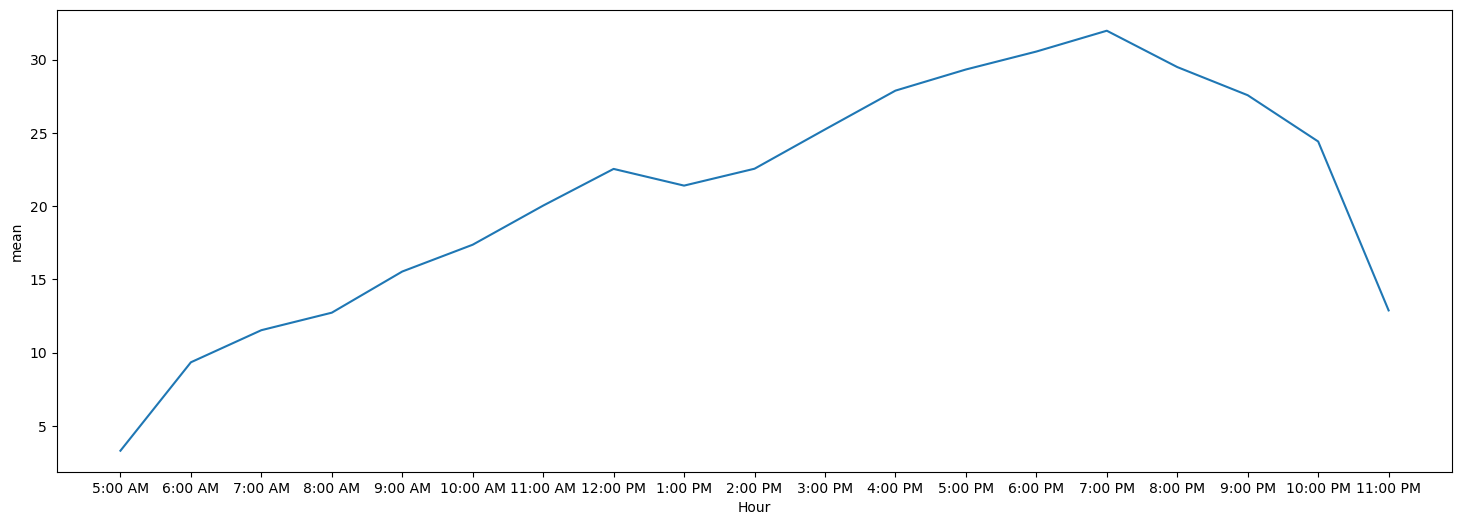

In [4]:
plt.figure(figsize=(18, 6))
plt.plot(df['values'])
plt.xlabel("Hour")
plt.ylabel("mean")

In [5]:
df=data.iloc[:,2:23]
df = df.groupby('Date').sum().reset_index()
df.set_index(['Date'], inplace=True)
#df['Total_Crowd'] = df.sum(axis=1)
#df = df['Total_Crowd'].round(0).astype(int)
df= pd.DataFrame(df)

#plt.plot(df.index,df['Total_Crowd'])
df

,5:00 AM,6:00 AM,7:00 AM,8:00 AM,9:00 AM,10:00 AM,11:00 AM,12:00 PM,1:00 PM,2:00 PM,3:00 PM,4:00 PM,5:00 PM,6:00 PM,7:00 PM,8:00 PM,9:00 PM,10:00 PM,11:00 PM,Total Count
Date,,,,,,,,,,,,,,,,,,,,
1/10/23 0:00,39.000000,84.000000,101.000000,149.000000,157.000000,186.000000,175.000000,200.674556,149.0,162.0,203.0,242.000000,236.000000,205.000000,285.000000,238.000000,235.000000,146.000000,60.264764,3089
1/11/23 0:00,12.358824,85.000000,115.000000,151.000000,153.000000,149.000000,200.000000,207.000000,161.0,158.0,193.0,282.000000,299.000000,304.000000,270.000000,202.000000,233.000000,239.000000,60.264764,3389
1/12/23 0:00,30.000000,68.000000,90.000000,132.000000,146.000000,161.000000,150.000000,176.000000,114.0,206.0,251.0,233.000000,250.000000,289.996063,261.000000,250.000000,230.000000,194.000000,70.827756,3136
1/13/23 0:00,28.000000,74.000000,90.000000,105.000000,111.000000,124.000000,143.000000,184.000000,154.0,163.0,172.0,242.000000,225.000000,232.000000,218.000000,211.000000,167.000000,141.000000,67.827756,2811
1/14/23 0:00,19.503922,53.543137,68.033399,63.000000,119.000000,136.000000,154.000000,135.000000,151.0,159.0,146.0,228.073819,196.117126,222.000000,186.720472,123.000000,107.000000,108.546260,74.000000,1877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/5/23 0:00,19.503922,53.543137,68.033399,26.000000,47.000000,64.000000,84.000000,114.000000,134.0,146.0,135.0,162.000000,170.000000,217.000000,213.010827,188.464567,163.452756,143.823819,60.264764,1425
3/6/23 0:00,22.000000,35.000000,47.000000,50.000000,40.000000,46.000000,59.000000,77.000000,80.0,102.0,112.0,130.000000,170.000000,214.000000,230.000000,228.000000,170.000000,102.731299,43.046260,1801
3/7/23 0:00,14.000000,43.000000,53.000000,58.000000,66.000000,83.000000,133.555118,84.000000,79.0,89.0,109.0,122.000000,165.000000,220.000000,296.430118,265.000000,140.102362,123.277559,51.655512,1756


In [6]:
train_data=df['5:00 PM']
train_data=train_data.values
train_data = train_data.astype('float32')
train_data

array([236.     , 299.     , 250.     , 225.     , 196.11713, 163.     ,
       194.     , 271.     , 241.     , 215.     , 110.     , 215.     ,
       174.     , 188.     , 216.     , 276.     , 260.     , 264.     ,
       234.     , 158.     , 158.     , 105.     , 266.     , 258.     ,
       117.     , 196.11713, 178.06693, 145.     , 241.     , 246.06693,
       220.     , 223.     , 160.     , 125.     , 231.     , 241.     ,
       182.     , 231.     , 220.     , 157.     , 137.     , 279.     ,
       188.     , 197.     , 203.     , 209.0502 , 305.     , 159.     ,
       194.     , 250.     , 184.     , 202.     , 154.     , 178.     ,
       282.     , 232.     , 185.     , 265.     , 193.     , 160.     ,
       174.     , 176.     , 276.     , 249.     , 230.     , 236.     ,
       177.     , 161.     , 170.     , 170.     , 165.     , 133.     ,
       137.     ], dtype=float32)

In [7]:
#Use data until 14 days before as training
x = len(train_data)-10

train=train_data[:x].reshape(-1,1)
test = train_data[x:].reshape(-1,1)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [9]:
from keras.preprocessing.sequence import TimeseriesGenerator
# define generator
n_input = 5
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [10]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.655      0.97       0.725      0.6        0.45558566]
Predict this y: 
 [[0.29000002]]


In [11]:
X.shape
     

(1, 5, 1)

In [12]:
num_features=1
model = Sequential()
model.add(LSTM(128,return_sequences=True ,activation='relu', input_shape=(n_input, n_features)))
model.add(LSTM((64),activation='relu'))
model.add(Dense(32))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 118,081
Trainable params: 118,081
Non-trainable params: 0
_________________________________________________________________


In [13]:
history=model.fit(generator,epochs=50)

Epoch 1/50
58/58 [==============================] - 1s 3ms/step - loss: 0.0975
Epoch 2/50
58/58 [==============================] - 0s 3ms/step - loss: 0.0669
Epoch 3/50
58/58 [==============================] - 0s 4ms/step - loss: 0.0627
Epoch 4/50
58/58 [==============================] - 0s 3ms/step - loss: 0.0627
Epoch 5/50
58/58 [==============================] - 0s 3ms/step - loss: 0.0609
Epoch 6/50
58/58 [==============================] - 0s 3ms/step - loss: 0.0616
Epoch 7/50
58/58 [==============================] - 0s 4ms/step - loss: 0.0604
Epoch 8/50
58/58 [==============================] - 0s 3ms/step - loss: 0.0583
Epoch 9/50
58/58 [==============================] - 0s 3ms/step - loss: 0.0621
Epoch 10/50
58/58 [==============================] - 0s 3ms/step - loss: 0.0596
Epoch 11/50
58/58 [==============================] - 0s 3ms/step - loss: 0.0561
Epoch 12/50
58/58 [==============================] - 0s 3ms/step - loss: 0.0579
Epoch 13/50
58/58 [==============================

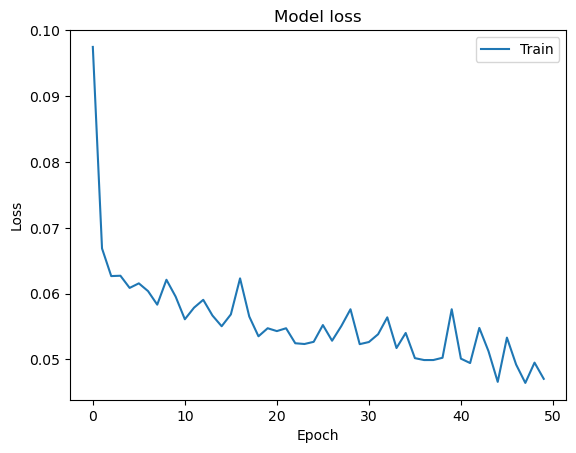

In [14]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

In [15]:
model.save('LSTM_model.h5')

In [16]:
last_train_batch = scaled_train[-5:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [17]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 189ms/step


array([[0.6378319]], dtype=float32)

In [18]:
scaled_test[0]

array([0.72], dtype=float32)

In [19]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


1/1 [==============================] - 0s 16ms/step


In [20]:
test_predictions


[array([0.6378319], dtype=float32),
 array([0.54768723], dtype=float32),
 array([0.47446513], dtype=float32),
 array([0.44825357], dtype=float32),
 array([0.46454638], dtype=float32),
 array([0.5687738], dtype=float32),
 array([0.6005791], dtype=float32),
 array([0.57507557], dtype=float32),
 array([0.53257984], dtype=float32),
 array([0.50191206], dtype=float32)]

In [21]:
true_predictions = scaler.inverse_transform(test_predictions)
test

array([[249.],
       [230.],
       [236.],
       [177.],
       [161.],
       [170.],
       [170.],
       [165.],
       [133.],
       [137.]], dtype=float32)

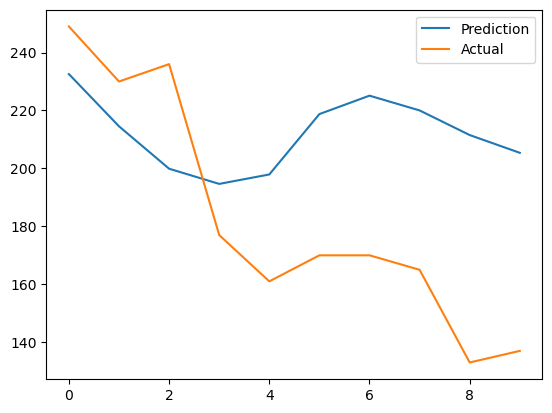

In [22]:
plt.plot(true_predictions)
plt.plot(test)
plt.legend(['Prediction','Actual'], loc='upper right')

In [23]:
future_test_predictions = []

first_eval_batch = scaled_test[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    future_test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    
future_test_predictions=scaler.inverse_transform(future_test_predictions)
future_test_predictions=np.array(future_test_predictions)

1/1 [==============================] - 0s 17ms/step


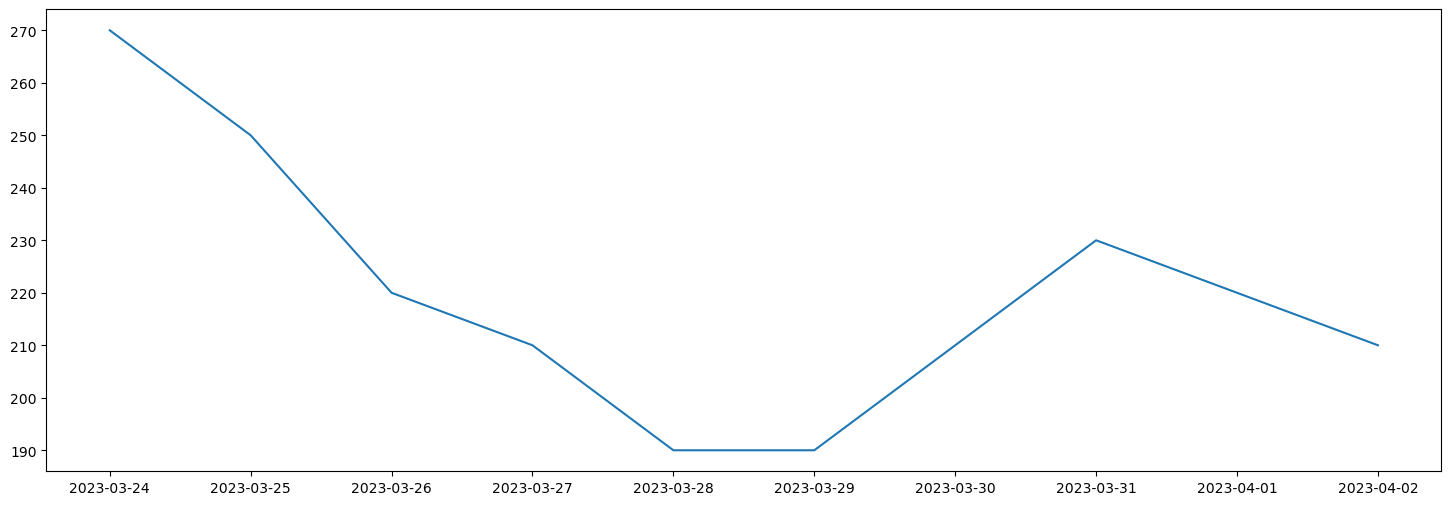

In [24]:
dates = pd.date_range(start='2023-03-24', end='2023-04-02')
output=pd.DataFrame()
output['Dates']=dates
output['Predictions']=future_test_predictions
output['Predictions'] = output['Predictions'].round(decimals=-1)
plt.figure(figsize=(18, 6))
plt.plot(output["Dates"],output['Predictions'])


In [25]:
import tkinter as tk
import pandas as pd
from tkintertable import TableCanvas
from pandastable import Table
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
class App:
    def __init__(self, master):
        self.master = master
        master.title("Choose Columns")

        # Load the dataset
        self.df = pd.read_csv('/Users/harisha/Documents/Northeastern/CS6140/ML project/Modified.csv')
        self.column_names = self.df.columns

        # Create a label to display column names
        self.label = tk.Label(master, text="Different times avaliable for prediction:")
        self.label.pack()

        # Create a listbox to select columns
        self.listbox = tk.Listbox(master, selectmode=tk.MULTIPLE)
        for name in self.column_names:
            self.listbox.insert(tk.END, name)
        self.listbox.pack()

        # Create a button to filter the dataset
        self.filter_button = tk.Button(master, text="Predict using LSTM", command=self.filter_dataset)
        self.filter_button.pack()

        # Create a text area to display filtered dataset
        self.text_area = tk.Text(master)
        self.text_area.pack()

    def filter_dataset(self):
        # Get the selected column names
        selected_indices = self.listbox.curselection()
        selected_columns = [self.column_names[i] for i in selected_indices]

        # Filter the dataset to only include selected columns
        filtered_df = self.df[selected_columns]
        
        train_data=filtered_df
        train_data=train_data.values
        train_data = train_data.astype('float32')
        
        #Use data until 14 days before as training
        x = len(train_data)-10
        train=train_data[:x].reshape(-1,1)
        test = train_data[x:].reshape(-1,1)
        
        from sklearn.preprocessing import MinMaxScaler
        scaler = MinMaxScaler()
        scaler.fit(train)
        scaled_train = scaler.transform(train)
        scaled_test = scaler.transform(test)
        
        from keras.preprocessing.sequence import TimeseriesGenerator
        # define generator
        n_input = 5
        n_features = 1
        generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)
        
        num_features=1
        model = Sequential()
        model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
        model.add(Dense(32))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mean_squared_error')
        
        model.fit(generator,epochs=50)
        test_predictions = []

        first_eval_batch = scaled_test[-n_input:]
        current_batch = first_eval_batch.reshape((1, n_input, n_features))

        for i in range(len(test)):
            current_pred = model.predict(current_batch)[0]
            test_predictions.append(current_pred) 
            current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
        
        true_predictions = scaler.inverse_transform(test_predictions)
        true_predictions=np.array(true_predictions)
        #true_predictions = np.array2string(true_predictions)
        
        
        dates = pd.date_range(start='2023-03-24', end='2023-04-02')
        output=pd.DataFrame()
        output['Dates']=dates
        output['Predictions']=true_predictions
        output['Predictions'] = output['Predictions'].round(decimals=-1)
     
        fig = plt.figure(figsize=(18, 6))
        ax = fig.add_subplot(111)
        ax.plot(output['Dates'],true_predictions)
        
        canvas = FigureCanvasTkAgg(fig, master=root)
        canvas.draw()
        canvas.get_tk_widget().pack()



        
        
        self.text_area.delete('1.0', tk.END)
        self.text_area.insert(tk.END, output.to_string())

root = tk.Tk()
app = App(root)
root.mainloop()


Epoch 1/50
58/58 [==============================] - 1s 2ms/step - loss: 0.1264
Epoch 2/50
58/58 [==============================] - 0s 2ms/step - loss: 0.0729
Epoch 3/50
58/58 [==============================] - 0s 2ms/step - loss: 0.0702
Epoch 4/50
58/58 [==============================] - 0s 2ms/step - loss: 0.0681
Epoch 5/50
58/58 [==============================] - 0s 2ms/step - loss: 0.0691
Epoch 6/50
58/58 [==============================] - 0s 2ms/step - loss: 0.0652
Epoch 7/50
58/58 [==============================] - 0s 2ms/step - loss: 0.0661
Epoch 8/50
58/58 [==============================] - 0s 2ms/step - loss: 0.0633
Epoch 9/50
58/58 [==============================] - 0s 2ms/step - loss: 0.0583
Epoch 10/50
58/58 [==============================] - 0s 2ms/step - loss: 0.0595
Epoch 11/50
58/58 [==============================] - 0s 2ms/step - loss: 0.0581
Epoch 12/50
58/58 [==============================] - 0s 2ms/step - loss: 0.0579
Epoch 13/50
58/58 [==============================